In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
import pandas_profiling as pp
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import files
upload = files.upload() 

Saving StudentsPerformance.csv to StudentsPerformance (1).csv


In [3]:
sp = pd.read_csv("StudentsPerformance.csv")

In [4]:
df=pd.DataFrame(sp)

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [7]:
def label_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'


In [8]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [11]:
df[df.duplicated()]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


**Gender**

In [12]:
df["gender"].value_counts()

female    518
male      482
Name: gender, dtype: int64

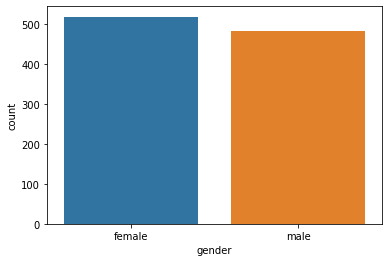

In [13]:
plt.xlabel("Gender")
plt.ylabel("Count")
sns.countplot(df["gender"])

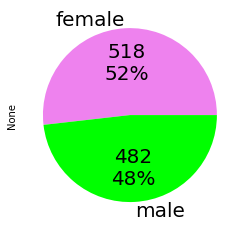

In [14]:
df.groupby('gender').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20}, colors=['violet', 'lime'])

**The datasethas a total of 518 Females and 482 males**<br>
**The females are 51.80 % of the entire population and the males comes out to be 48.20 % of the entire population**

**Race/Ethnicity**

In [15]:
df["race/ethnicity"].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

Text(0, 0.5, 'Count')

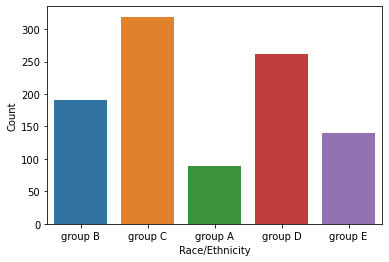

In [16]:
sns.countplot(df["race/ethnicity"])
plt.xlabel("Race/Ethnicity")
plt.ylabel("Count")

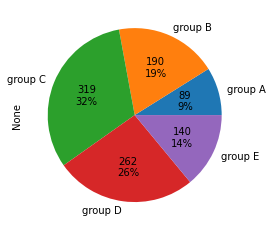

In [17]:
df.groupby('race/ethnicity').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 10})

**Parental level of education**

In [18]:
df["parental level of education"].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

Text(0, 0.5, 'Count')

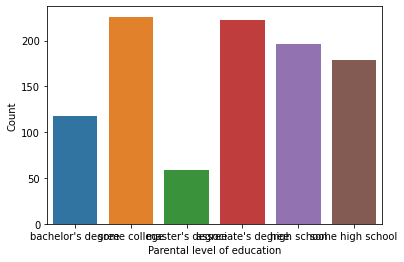

In [19]:
sns.countplot(df["parental level of education"])
plt.xlabel("Parental level of education")
plt.ylabel("Count")

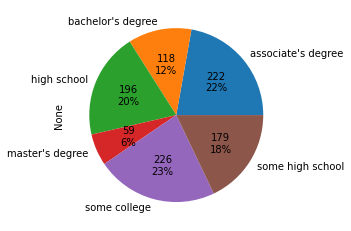

In [20]:
df.groupby('parental level of education').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 10})

**Lunch**


In [21]:
df["lunch"].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

Text(0, 0.5, 'Count')

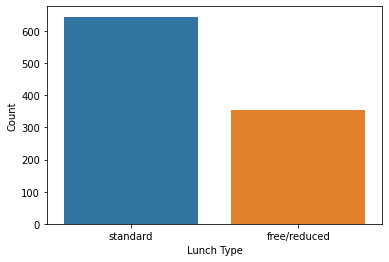

In [22]:
sns.countplot(df["lunch"])
plt.xlabel("Lunch Type")
plt.ylabel("Count")

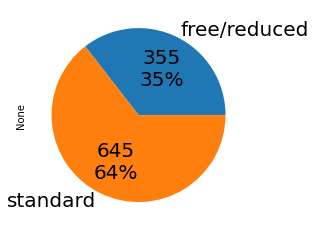

In [23]:
df.groupby('lunch').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20})

**Test preparation course**

In [24]:
df["test preparation course"].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

Text(0, 0.5, 'Count')

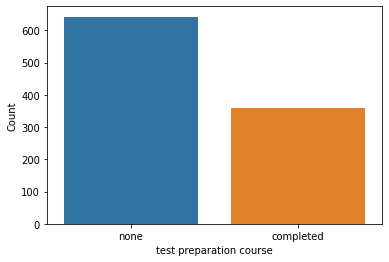

In [25]:
sns.countplot(df["test preparation course"])
plt.xlabel("test preparation course")
plt.ylabel("Count")

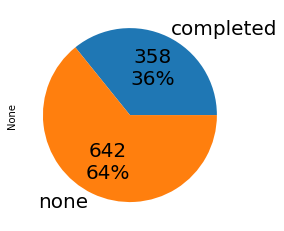

In [26]:
df.groupby('test preparation course').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20})

**GroupBy on the basis of Gender and Race/Ethnicity**

In [27]:
df.groupby(["gender", "race/ethnicity"]).size()

gender  race/ethnicity
female  group A            36
        group B           104
        group C           180
        group D           129
        group E            69
male    group A            53
        group B            86
        group C           139
        group D           133
        group E            71
dtype: int64

**Groupby on the basis of Gender and Parental level of education**

In [28]:
df.groupby(["gender", "parental level of education"]).size()

gender  parental level of education
female  associate's degree             116
        bachelor's degree               63
        high school                     94
        master's degree                 36
        some college                   118
        some high school                91
male    associate's degree             106
        bachelor's degree               55
        high school                    102
        master's degree                 23
        some college                   108
        some high school                88
dtype: int64

**GroupBy on the Basis of Gender and Lunch**

In [29]:
df.groupby(["gender", "lunch"]).size()

gender  lunch       
female  free/reduced    189
        standard        329
male    free/reduced    166
        standard        316
dtype: int64

**GroupBy on the basis of Gender and test preparation course**

In [30]:
df.groupby(["gender", "test preparation course"]).size()

gender  test preparation course
female  completed                  184
        none                       334
male    completed                  174
        none                       308
dtype: int64

**GroupBy on the basis of Race and parental level of education**

In [31]:
df.groupby(["race/ethnicity", "parental level of education"]).size()

race/ethnicity  parental level of education
group A         associate's degree             14
                bachelor's degree              12
                high school                    18
                master's degree                 3
                some college                   18
                some high school               24
group B         associate's degree             41
                bachelor's degree              20
                high school                    48
                master's degree                 6
                some college                   37
                some high school               38
group C         associate's degree             78
                bachelor's degree              40
                high school                    64
                master's degree                19
                some college                   69
                some high school               49
group D         associate's degree             50
      

**GroupBy on the basis of Race/ethnicity and Lunch**

In [32]:
df.groupby(["race/ethnicity", "lunch"]).size()

race/ethnicity  lunch       
group A         free/reduced     36
                standard         53
group B         free/reduced     69
                standard        121
group C         free/reduced    114
                standard        205
group D         free/reduced     95
                standard        167
group E         free/reduced     41
                standard         99
dtype: int64

**GroupBy on the basis of Race/ethnicity and Test preparation course**

In [33]:
df.groupby(["race/ethnicity", "test preparation course"]).size()

race/ethnicity  test preparation course
group A         completed                   31
                none                        58
group B         completed                   68
                none                       122
group C         completed                  117
                none                       202
group D         completed                   82
                none                       180
group E         completed                   60
                none                        80
dtype: int64

**GroupBy on the Basis of Parental Level of Education and Lunch**

In [34]:
df.groupby(["parental level of education","lunch"]).size()

parental level of education  lunch       
associate's degree           free/reduced     77
                             standard        145
bachelor's degree            free/reduced     44
                             standard         74
high school                  free/reduced     70
                             standard        126
master's degree              free/reduced     24
                             standard         35
some college                 free/reduced     79
                             standard        147
some high school             free/reduced     61
                             standard        118
dtype: int64

**GroupBy on the Basis of Parental Level of Education and Test Preperation Course**

In [35]:
df.groupby(["parental level of education","test preparation course"]).size()

parental level of education  test preparation course
associate's degree           completed                   82
                             none                       140
bachelor's degree            completed                   46
                             none                        72
high school                  completed                   56
                             none                       140
master's degree              completed                   20
                             none                        39
some college                 completed                   77
                             none                       149
some high school             completed                   77
                             none                       102
dtype: int64

**GroupBy on the Basis of Lunch and Test preparation course**

In [36]:
df.groupby(["lunch","test preparation course"]).size()

lunch         test preparation course
free/reduced  completed                  131
              none                       224
standard      completed                  227
              none                       418
dtype: int64

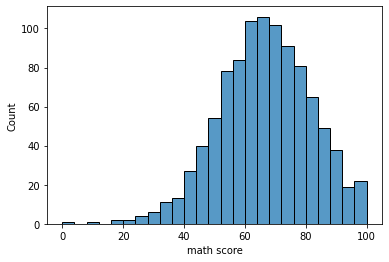

In [37]:
sns.histplot(data = df, x="math score", bins="auto", legend=True)

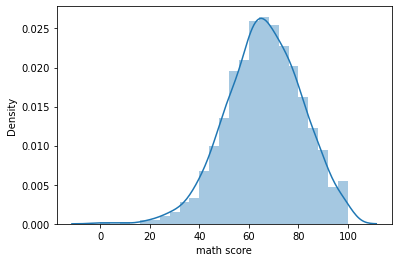

In [38]:
sns.distplot(df["math score"])

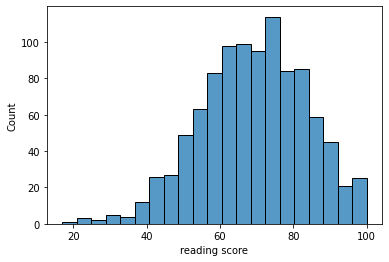

In [39]:
sns.histplot(data = df, x = "reading score")

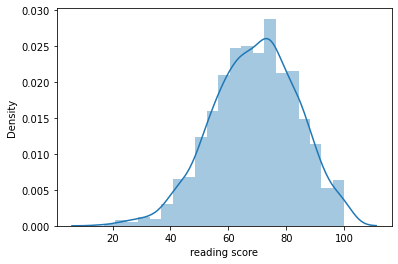

In [40]:
sns.distplot(df["reading score"])

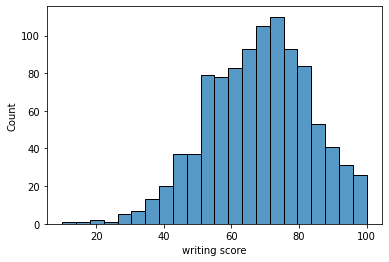

In [41]:
sns.histplot(df["writing score"])

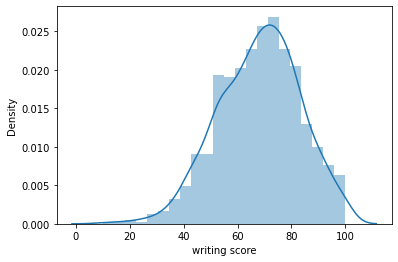

In [42]:
sns.distplot(df["writing score"])

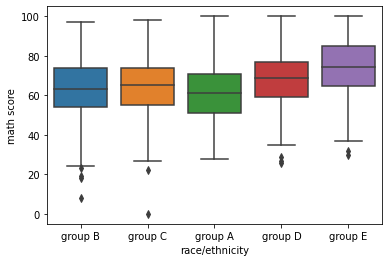

In [43]:
sns.boxplot(data = df, x = "race/ethnicity", y="math score")

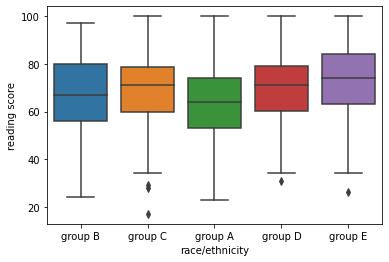

In [44]:
sns.boxplot(data=df, x="race/ethnicity", y="reading score")

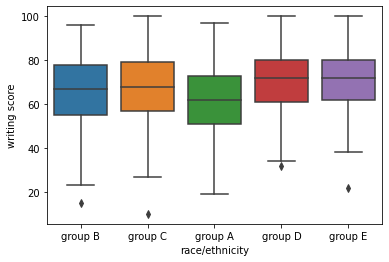

In [45]:
sns.boxplot(data=df, x="race/ethnicity", y="writing score")

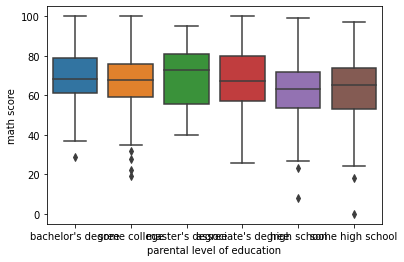

In [46]:
sns.boxplot(data=df, x="parental level of education", y="math score")

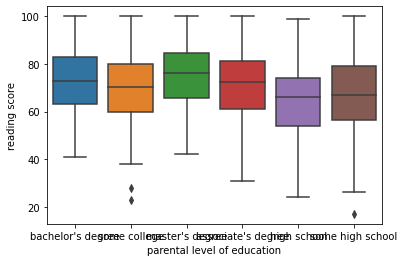

In [47]:
sns.boxplot(data=df, x="parental level of education", y="reading score")

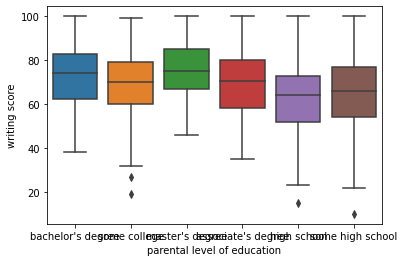

In [48]:
sns.boxplot(data=df, x="parental level of education", y="writing score")

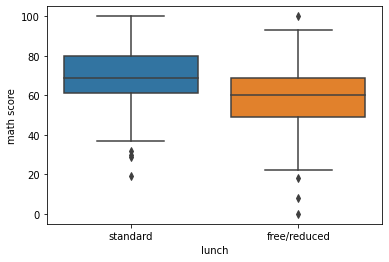

In [49]:
sns.boxplot(data=df, x="lunch", y="math score")

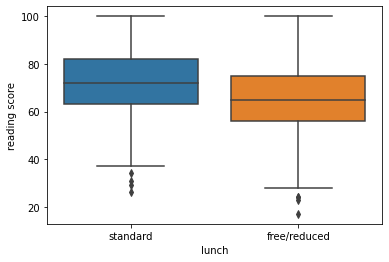

In [50]:
sns.boxplot(data=df, x="lunch", y="reading score")

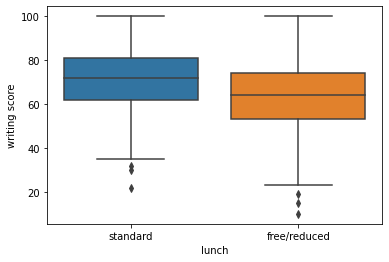

In [51]:
sns.boxplot(data=df, x="lunch", y="writing score")

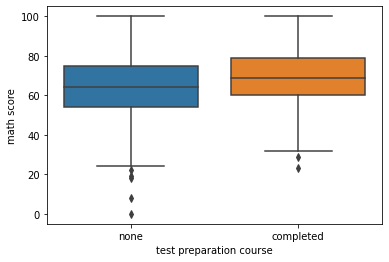

In [52]:
sns.boxplot(data=df, x="test preparation course", y="math score")

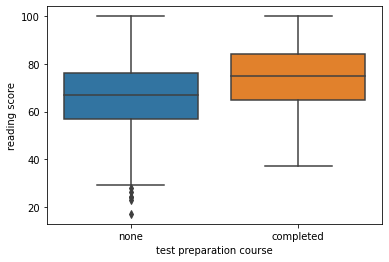

In [53]:
sns.boxplot(data=df, x="test preparation course", y="reading score")

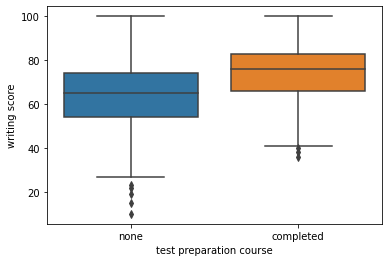

In [54]:
sns.boxplot(data=df, x="test preparation course", y="writing score")

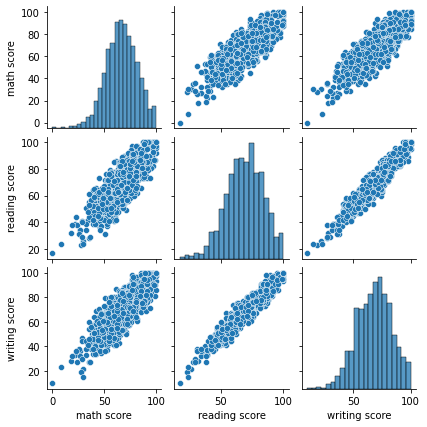

In [55]:
sns.pairplot(data=df, diag_kind="hist", height=2)

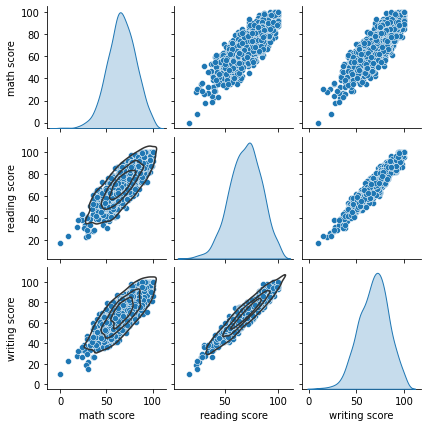

In [56]:
g = sns.pairplot(data=df, diag_kind="kde", height=2)
g.map_lower(sns.kdeplot, levels=4, color="0.2")

In [57]:
gender = round(df.groupby(["gender"])["math score","reading score", "writing score"].mean(),2)
gender= gender.reset_index()
gender

,gender,math score,reading score,writing score
0,female,63.63,72.61,72.47
1,male,68.73,65.47,63.31


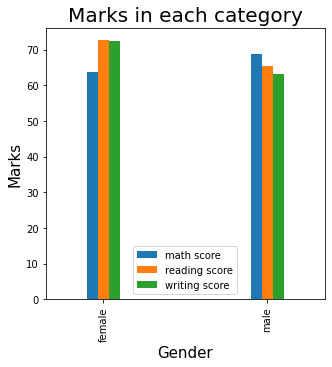

In [58]:
gender.plot(x="gender",y=["math score","reading score","writing score"],kind="bar",figsize=(5,5),width=0.2)
plt.xlabel("Gender",size=15)
plt.ylabel("Marks",size=15)
plt.title("Marks in each category",size=20)
plt.show()

In [59]:
race = round(df.groupby(by= "race/ethnicity")["math score", "reading score", "writing score"].mean(),2)
race = race.reset_index()
race

,race/ethnicity,math score,reading score,writing score
0,group A,61.63,64.67,62.67
1,group B,63.45,67.35,65.60
2,group C,64.46,69.10,67.83
3,group D,67.36,70.03,70.15
4,group E,73.82,73.03,71.41


Text(0.5, 1.0, 'Socres on the basisi of Race')

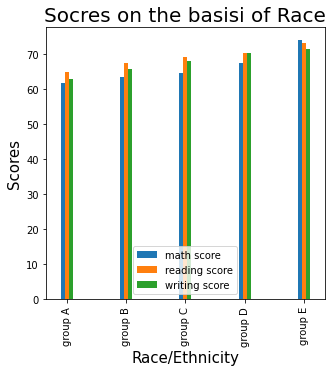

In [60]:
race.plot(kind="bar", x="race/ethnicity", y=["math score", "reading score", "writing score"], figsize=(5,5), width=0.2)
plt.xlabel("Race/Ethnicity",size=15)
plt.ylabel("Scores", size=15)
plt.title("Socres on the basisi of Race",size=20)

In [61]:
ple = round(df.groupby(by = "parental level of education")["math score", "reading score", "writing score"].mean(),2)
ple = ple.reset_index()
ple

,parental level of education,math score,reading score,writing score
0,associate's degree,67.88,70.93,69.90
1,bachelor's degree,69.39,73.00,73.38
2,high school,62.14,64.70,62.45
3,master's degree,69.75,75.37,75.68
4,some college,67.13,69.46,68.84
5,some high school,63.50,66.94,64.89


Text(0.5, 1.0, 'Scores on the basis of Parental level of Education')

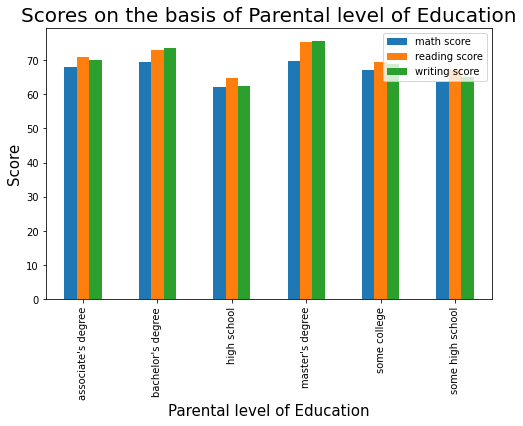

In [62]:
ple.plot(kind="bar", x="parental level of education", y=["math score", "reading score", "writing score"], figsize=(8,5), width=0.5)
plt.xlabel("Parental level of Education", size=15)
plt.ylabel("Score", size=15)
plt.title("Scores on the basis of Parental level of Education",size=20)

In [63]:
lun = round(df.groupby(by="lunch")["math score","reading score","writing score"].mean(),2)
lun=lun.reset_index()
lun

,lunch,math score,reading score,writing score
0,free/reduced,58.92,64.65,63.02
1,standard,70.03,71.65,70.82


Text(0.5, 1.0, 'Scores on the basis of Lunch Type')

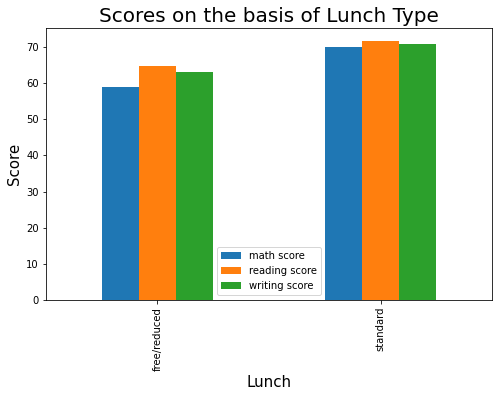

In [64]:
lun.plot(kind="bar", x="lunch", y=["math score", "reading score", "writing score"], figsize=(8,5), width=0.5)
plt.xlabel("Lunch", size=15)
plt.ylabel("Score", size=15)
plt.title("Scores on the basis of Lunch Type",size=20)

In [65]:
tpc = round(df.groupby(by="test preparation course")["math score","reading score","writing score"].mean(),2)
tpc = tpc.reset_index()
tpc

,test preparation course,math score,reading score,writing score
0,completed,69.70,73.89,74.42
1,none,64.08,66.53,64.50


Text(0.5, 1.0, 'Scores on the basis of Test Preperation Course')

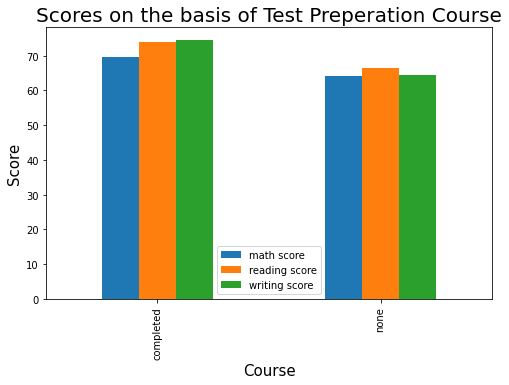

In [66]:
tpc.plot(kind="bar", x="test preparation course", y=["math score", "reading score", "writing score"], figsize=(8,5), width=0.5)
plt.xlabel("Course", size=15)
plt.ylabel("Score", size=15)
plt.title("Scores on the basis of Test Preperation Course",size=20)

In [67]:
df["total score"] = df["math score"] + df["reading score"] + df["writing score"]

In [68]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


               math score  reading score  writing score  total score
math score           1.00           0.82           0.80         0.92
reading score        0.82           1.00           0.95         0.97
writing score        0.80           0.95           1.00         0.97
total score          0.92           0.97           0.97         1.00


Text(0.5, 1.0, 'Heatmap')

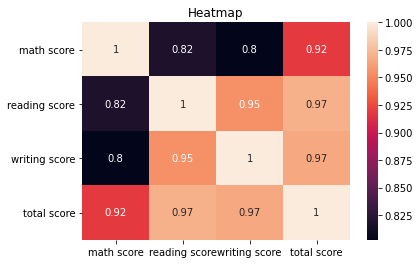

In [69]:
print(round(df.corr(),2))
sns.heatmap(df.corr(), annot=True)
plt.title("Heatmap")

**Modelling = Random Forest**

In [70]:
X, Y = make_classification(n_samples=1000, n_features=14, n_informative=9, n_redundant=5, random_state=3)
print(X.shape)
print(Y.shape)

(1000, 14)
(1000,)


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [72]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [73]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred)*100,2),"%")

Accuracy: 90.67 %


**SVM**

In [74]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [75]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred)*100,2),"%")


Accuracy: 84.0 %
